Step 3 ER Diagram:
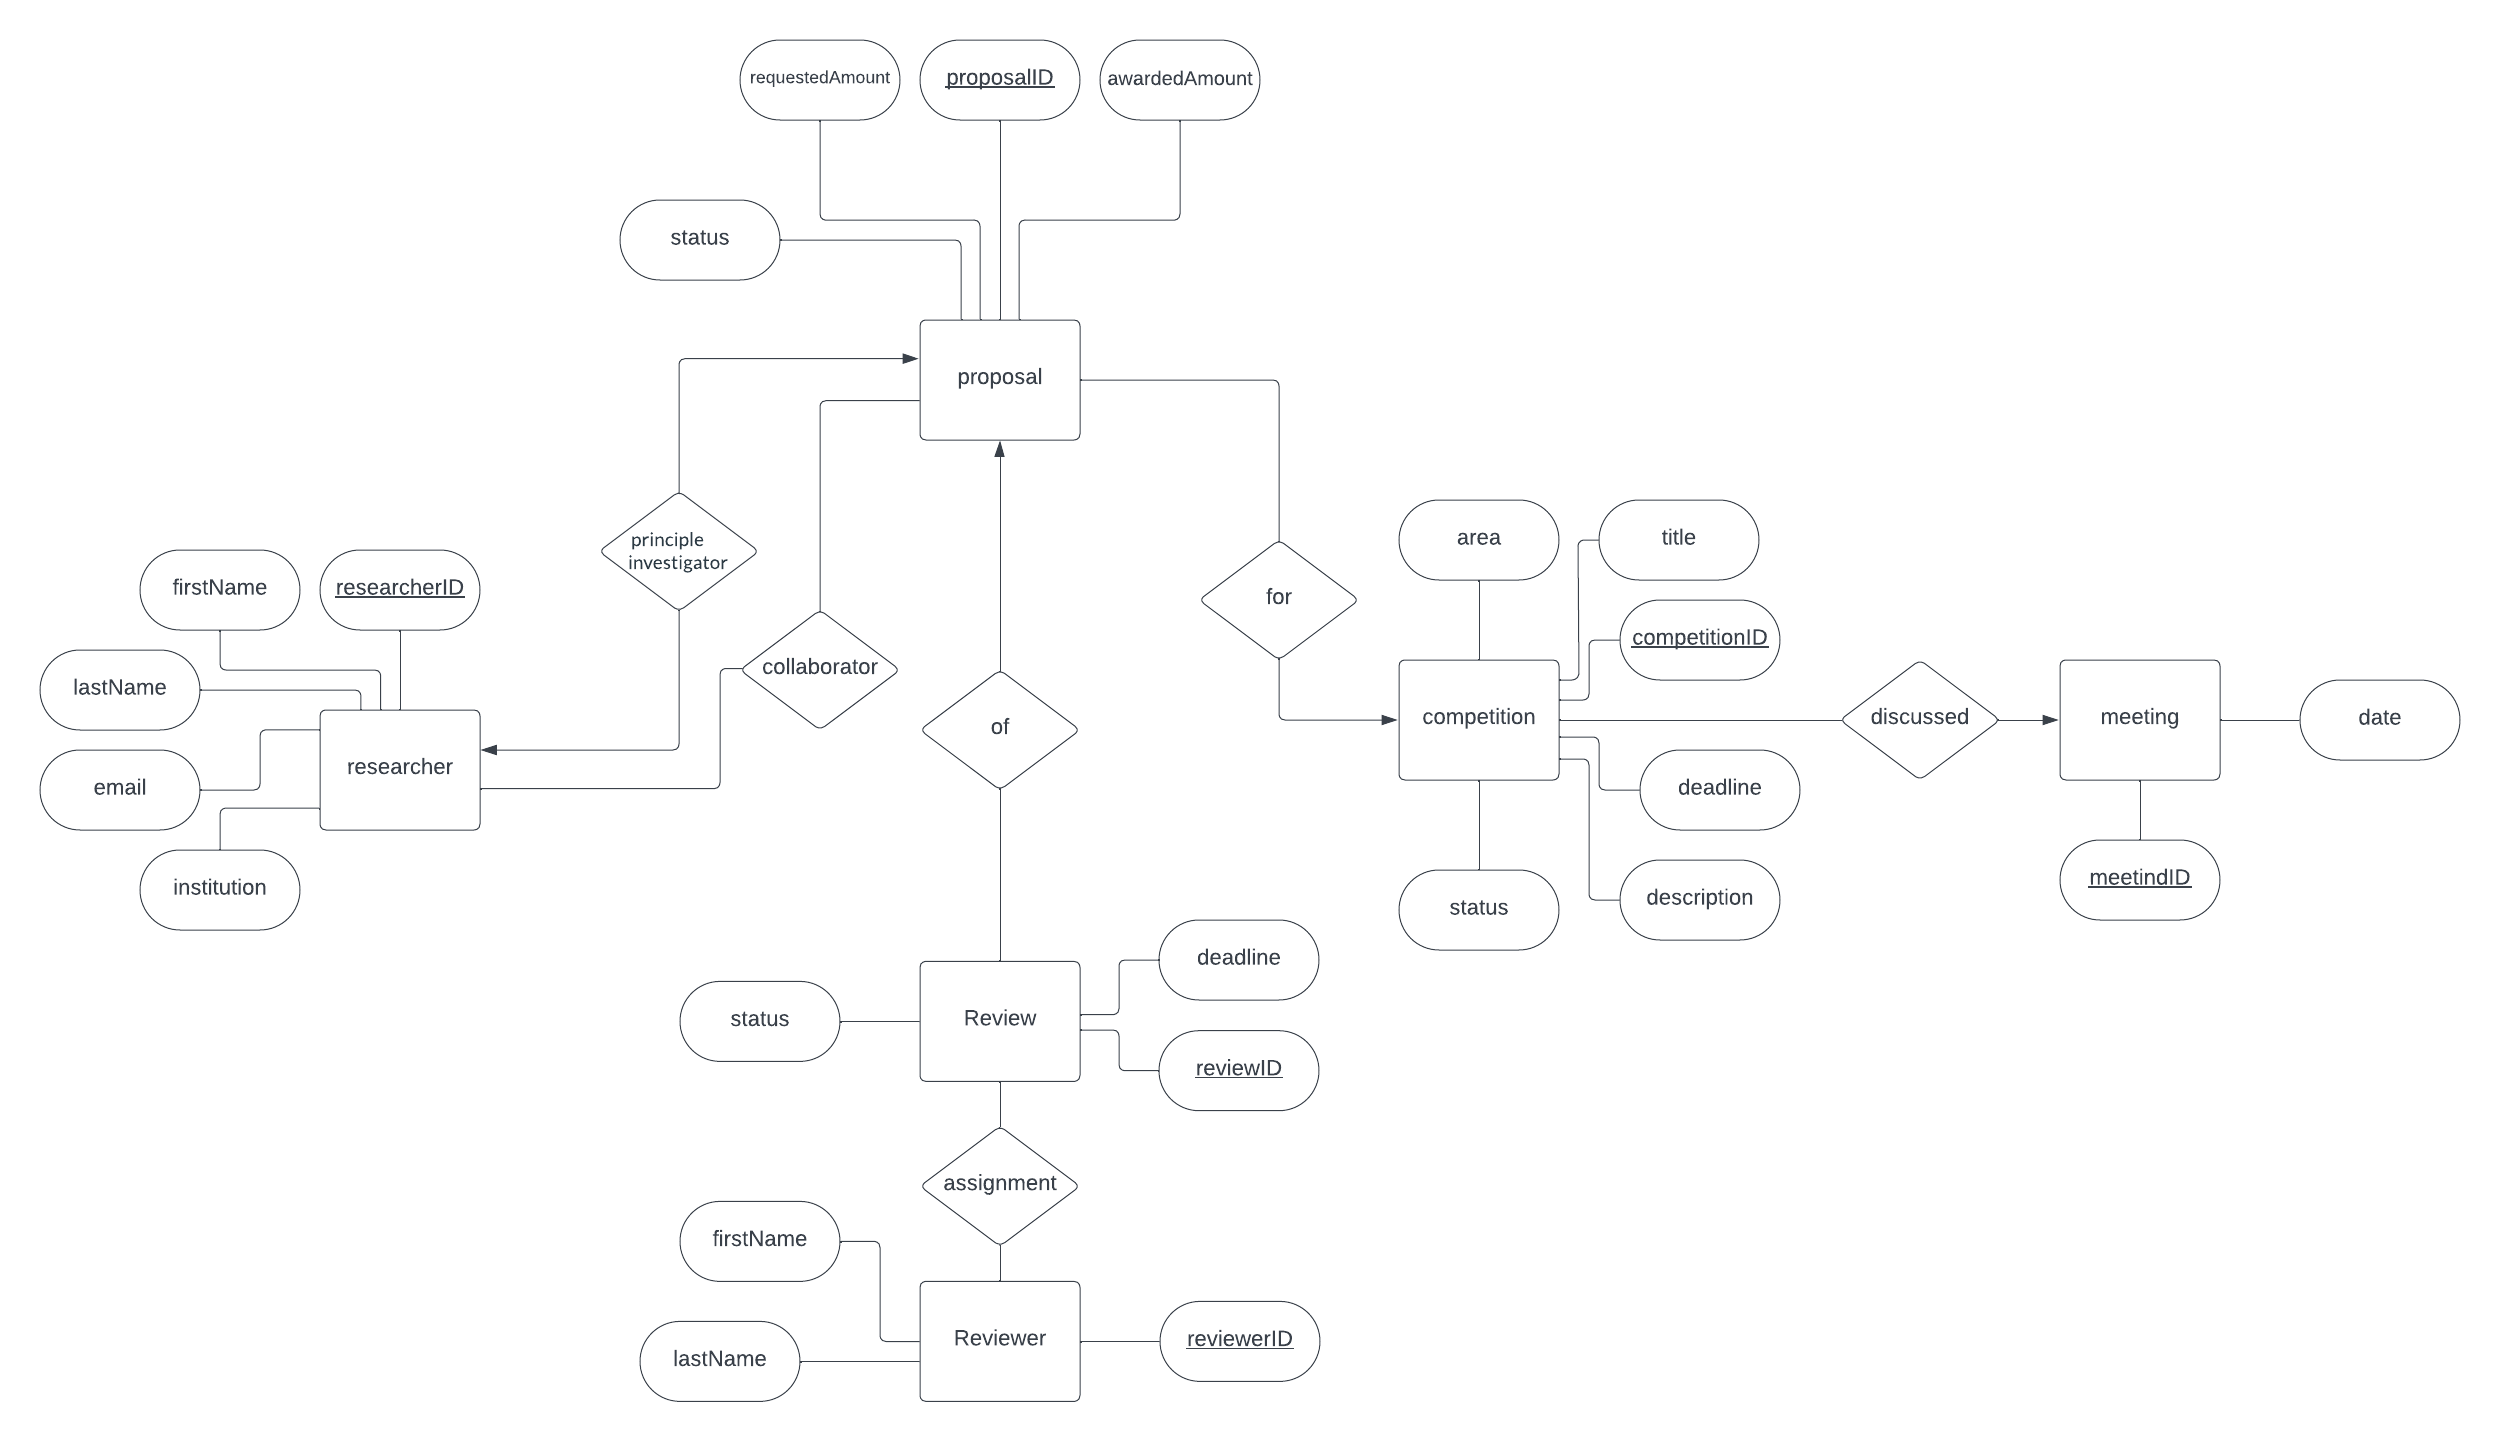

Step 5 SQL Schema:

- Researcher = {<span style="text-decoration:underline">researcherID</span>, firstName, lastName, email, institution}
- Proposal = {<span style="text-decoration:underline">proposalID</span>, requestedAmount, awardedAmount, status}
- Review = {<span style="text-decoration:underline">reviewID</span>, status, deadline}
- Reviewer = {<span style="text-decoration:underline">reviewerID</span>, firstName, lastName}
- Assignment = {<span style="text-decoration:underline">reviewerID</span><span><sup>FK-Reviewer</sup>, <span style="text-decoration:underline">reviewID</span><span><sup>FK-Review</sup>}
- Competition = {<span style="text-decoration:underline">competitionID</span>, area, title, deadline, description, status}
- Meeting = {<span style="text-decoration:underline">meetingID</span>, date}